### Discussion Related With Outliers And Impact On Machine Learning

In [1]:
import pandas as pd
import numpy as np

D:\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


#### Which Machine Learning models are sensitive to the outiers? (The answers depends on maths behind that models)
1. Naive Bayes Classifier--- Not Sensitive(Means getting impacted) To Outliers
2. SVM---------------------- Not Sensitive To Outliers
3. Linear Regression-------- Sensitive To Outliers
4. Logistic Regression------ Sensitive To Outliers
5. Decision Tree Regressor or Classifier----  Not Sensitive To Outliers
6. Ensemble(Random Forest, XGboost, Gridient Boosting)--- Not Sensitive To Outliers(It internally uses decision tree)
7. K-Neartest Neighbour(KNN)------------- Not Sensitive To Outliers
8. Kmeans Clustering--------------------- Sensitive To Outliers
9. Hierachical Clustering---------------- Sensitive To Outliers
10. PCA(Principle Component Analysis)---- Sensitive To Outliers (always remove outliers when applying PCA)
11. Neural Networks---------------------- Sensitive To Outliers

In [2]:
df= pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

In [5]:
import seaborn as sns

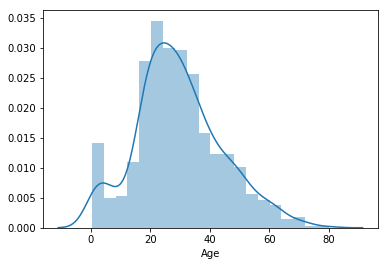

In [6]:
sns.distplot(df['Age'].dropna())

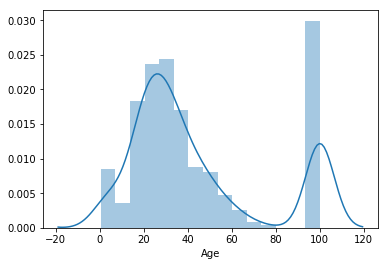

In [7]:
sns.distplot(df['Age'].fillna(100))

#### Gaussian Distributed

Text(0,0.5,'No of passanger')

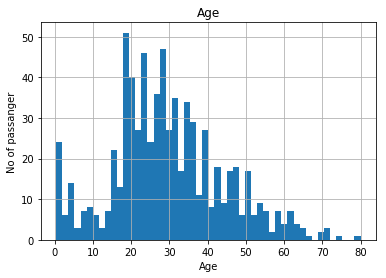

In [9]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger')

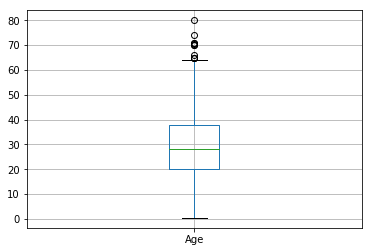

In [10]:
figure = df.boxplot(column='Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If the data is Normally Distributed we use this

In [13]:
#### Assuming Age Follows a Gausian Distribution we will calculate the boundaries which differentiate the outliers.

upper_boundary = df['Age'].mean() + 3* df['Age'].std() # This is an 3rd Standard Deviation
lower_boundary = df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(upper_boundary), print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [15]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [16]:

lower_bridge = df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [17]:
#### Extreme Outliers
lower_bridge = df['Age'].quantile(0.25)-(IQR*3)# Before -33.5 outliers
upper_bridge = df['Age'].quantile(0.75)+(IQR*3) # After 91 outliers
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

#### Features is Skewed

Text(0,0.5,'No of passanger')

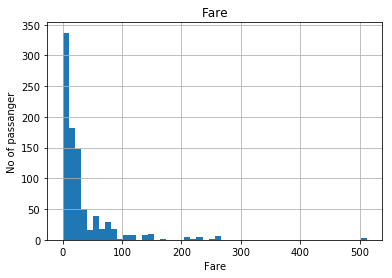

In [19]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')
#### This chart shows right skewed data

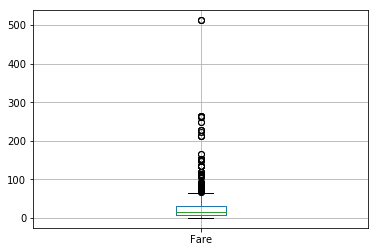

In [20]:
figure = df.boxplot(column='Fare')

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [23]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [25]:
#### When your data is skews data then you should use extreme outliers
#### Extreme Outliers
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)# Before -33.5 outliers
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3) # After 91 outliers
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [27]:
data = df.copy()

In [29]:
data.loc[data['Age']>73, 'Age'] = 73

Text(0,0.5,'No of passanger')

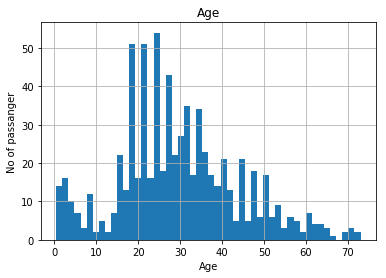

In [35]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passanger')

In [32]:
data.loc[data['Fare']>100, 'Fare'] = 100

Text(0,0.5,'No of passanger')

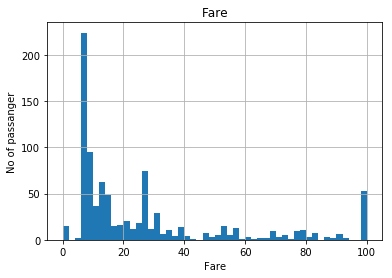

In [34]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passanger')

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=0.3)

In [39]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc Score: {}'.format(roc_auc_score(y_test, y_pred1[:,1])))

D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score: 0.6791044776119403
roc_auc Score: 0.7096744752053544


In [40]:
### Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc Score: {}'.format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy Score: 0.6828358208955224
roc_auc Score: 0.7160024338302404


D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
